## 예제
1. csv 폴더에서 4개의 파일을 로드 (tran1, tran2, tran_d_1, tran_d_2)
2. tran_1과 tran_2는 단순한 행 추가 결합 (유니언 결합)
3. tran_d_1과 tran_d_2도 유니언 결합
4. 2번, 3번 과정에서 나온 데이터프레임을 특정 조건에 맞춰서 2번 데이터 데이터프레임을 기준으로 열 추가 결합(조인 결합)
5. csv 폴더에 있는 2개의 파일 로드 (custom_master, item_master)
6. 4번 과정에서 나온 데이터프레임과 custom_master를 조인 결합
7. 6번에서 나온 데이터프레임과 item_master 조인 결합
8. 결합이 된 데이터프레임에서 quantity 컬럼과 item_price 컬럼의 데이터를 가지고 total_price라는 파생변수를 생성 (total price = item_price * quantity )

In [ ]:
import os
import pandas as pd
import list_load as ll

In [ ]:
tran1 = pd.read_csv('../230331/230403/230404/csv/tran_1.csv')

In [ ]:
tran2 = pd.read_csv('../230331/230403/230404/csv/tran_2.csv')

In [ ]:
tran_d_1 = pd.read_csv('../230331/230403/230404/csv/tran_d_1.csv')

In [ ]:
tran_d_2 = pd.read_csv('../230331/230403/230404/csv/tran_d_2.csv')

In [ ]:
# tran1, tran2 유니언 결합

tran3 = pd.concat([tran1, tran2], axis = 0, ignore_index = True)
tran3

In [ ]:
# tran_d_1, tran_d_2 유니언 결합

tran4 = pd.concat([tran_d_1, tran_d_2], axis = 0, ignore_index = True)
tran4

In [ ]:
# tran3, tran4 를 조인 결합 (조건 : transaction_id, how : tran)
tran5 = pd.merge(tran3, tran4, on = 'transaction_id' , how = 'left')
tran5

In [ ]:
custom_master = pd.read_csv('../230331/230403/230404/csv/customer_master.csv')
custom_master

In [ ]:
item_master = pd.read_csv('../230331/230403/230404/csv/item_master.csv')
item_master

In [ ]:
#tran, customer_master 조인 결합 (조건 : customer_id. how : inner, left)
# inner로 하면 교집합이니까 결측값이 덜 나온다 

tran_customer = pd.merge(tran5, custom_master, on = 'customer_id', how = "left")
tran_customer

In [ ]:
# total_df, item_master 조인결합 (조건 : item_id, how : inner)
tran7 = pd.merge(tran_customer, item_master, on = 'item_id', how = 'left')
tran7

In [ ]:
# 새로운 파생변수 생성 total_price
tran7['total_price'] = tran7['quantity'] * tran7['item_price']

In [ ]:
# 거래의 금액이 가장 많은 아이템은 무엇인가?

group_data = tran7[['item_name','total_price']].groupby('item_name').sum()


In [ ]:
# 내림차순 정렬
group_data.sort_values('total_price', ascending = False).index[0]

In [ ]:
tran7['gender']

In [ ]:
origin_data = tran7.copy()

In [ ]:
# loc를 이용하여 M,F를 변경
# M은 남자, F는 여자로 변경

tran7.loc[tran7['gender'] == 'M', 'gender'] = '남자'
tran7.loc[tran7['gender'] == 'F', 'gender'] = '여자' 

In [ ]:
tran7['gender'].value_counts()

In [ ]:
tran7 = origin_data.copy()

In [ ]:
tran7

In [ ]:
# apply()를 사용하여 M,F 를 남,여로 변경

def change(x):
    # x 에는 M 아니면 F가 들어가야함
    if x == 'M':
        result = '남자'
    else :
        result = '여자'
    return result

tran7['gender'].apply(change)    

In [ ]:
tran7['gender'].apply(lambda x : "남자" if (x == 'M') else("여자" if (x == 'F') else "무응답"))

In [ ]:
# payment_date 을 시계열 데이터로 변경
# to_datetime()

tran7.head(1)

In [ ]:
tran7['payment_date'] = pd.to_datetime(tran7['payment_date'], format = "%Y-%m-%d %H:%M:%S")

In [ ]:
tran7.info()

In [92]:
# 월별 거래량을 만들어보자
# 시계열 데이터에서 연월 추출 후 새로운 파생변수 payment_month 생성
tran7['payment_month'] = tran7['payment_date'].dt.strftime('%m-%Y')


In [94]:
tran7.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,02-2019


In [97]:
#월별 거래량을 확인해보자
group_data = tran7[['payment_month','total_price']].groupby('payment_month').sum()

In [103]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<Axes: xlabel='payment_month'>

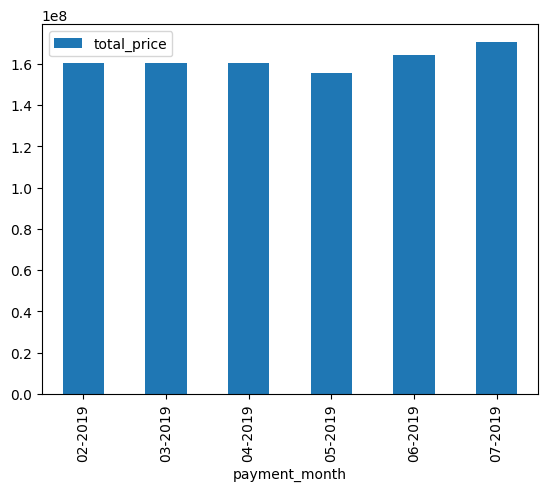

In [104]:
group_data.plot.bar()

In [111]:
pivot_data = pd.pivot_table(tran7, index = 'payment_month', aggfunc = ['sum','mean','min','max','std'], values = 'total_price' ).agg(['mean', 'sum'])